In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
digits = datasets.load_digits()

In [3]:
print(np.shape(digits.data))

(1797, 64)


In [4]:
print(np.shape(digits.target))

(1797,)


In [5]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

In [6]:
clf.fit(digits.data[:-1], digits.target[:-1])  

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
clf.predict(digits.data[-1:])

array([8])

<h3>Linear Regression</h3>

class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

- fit_intercept : boolean, optional, default True
whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (e.g. data is expected to be already centered).
- normalize : boolean, optional, default False
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use sklearn.preprocessing.StandardScaler before calling fit on an estimator with normalize=False.
- copy_X : boolean, optional, default True
If True, X will be copied; else, it may be overwritten.
- n_jobs : int or None, optional (default=None)
The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

<b>methods </b>
<table border="1" class="longtable docutils">
<colgroup>
<col width="10%">
<col width="90%">
</colgroup>
<tbody valign="top">
<tr class="row-odd"><td><a class="reference internal" href="#sklearn.linear_model.LinearRegression.fit" title="sklearn.linear_model.LinearRegression.fit"><code class="xref py py-obj docutils literal"><span class="pre">fit</span></code></a>(self,&nbsp;X,&nbsp;y[,&nbsp;sample_weight])</td>
<td>Fit linear model.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="#sklearn.linear_model.LinearRegression.get_params" title="sklearn.linear_model.LinearRegression.get_params"><code class="xref py py-obj docutils literal"><span class="pre">get_params</span></code></a>(self[,&nbsp;deep])</td>
<td>Get parameters for this estimator.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="#sklearn.linear_model.LinearRegression.predict" title="sklearn.linear_model.LinearRegression.predict"><code class="xref py py-obj docutils literal"><span class="pre">predict</span></code></a>(self,&nbsp;X)</td>
<td>Predict using the linear model</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="#sklearn.linear_model.LinearRegression.score" title="sklearn.linear_model.LinearRegression.score"><code class="xref py py-obj docutils literal"><span class="pre">score</span></code></a>(self,&nbsp;X,&nbsp;y[,&nbsp;sample_weight])</td>
<td>Returns the coefficient of determination R^2 of the prediction.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="#sklearn.linear_model.LinearRegression.set_params" title="sklearn.linear_model.LinearRegression.set_params"><code class="xref py py-obj docutils literal"><span class="pre">set_params</span></code></a>(self,&nbsp;\*\*params)</td>
<td>Set the parameters of this estimator.</td>
</tr>
</tbody>
</table>

array([16.])

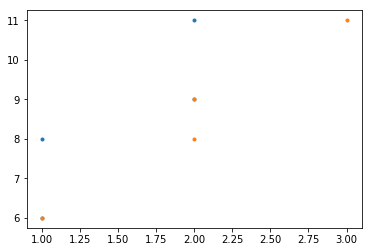

In [8]:
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
# np.daot is a scalar product of each input of X and [1,2]

plt.plot(X,y,'.')
plt.show
reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg.coef_
reg.intercept_ 
reg.predict(np.array([[3, 5]]))


<h3>Example of a linear reg model</h3>

Weather Conditions in World War Two: Is there a relationship between the daily minimum and maximum temperature? Can you predict the maximum temperature given the minimum temperature?

https://www.kaggle.com/smid80/weatherww2/data

In [9]:
import csv

d=[]

with open('LinReg_weather/Summary of Weather.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            head = row
            line_count += 1
        else:
            d.append(row)
            line_count += 1
    print(f'Processed {line_count} lines.')

Processed 119041 lines.


In [10]:
data = np.array(d)
data[1]

array(['10001', '1942-7-2', '0', '', '28.88888889', '21.66666667',
       '25.55555556', '0', '', '42', '7', '2', '0', '', '', '84', '71',
       '78', '0', '', '', '', '', '', '', '', '', '', '', '', ''],
      dtype='<U12')

In [11]:
head

['STA',
 'Date',
 'Precip',
 'WindGustSpd',
 'MaxTemp',
 'MinTemp',
 'MeanTemp',
 'Snowfall',
 'PoorWeather',
 'YR',
 'MO',
 'DA',
 'PRCP',
 'DR',
 'SPD',
 'MAX',
 'MIN',
 'MEA',
 'SNF',
 'SND',
 'FT',
 'FB',
 'FTI',
 'ITH',
 'PGT',
 'TSHDSBRSGF',
 'SD3',
 'RHX',
 'RHN',
 'RVG',
 'WTE']

In [12]:
y = data[:,4]
np.shape(y)
y = y.reshape(-1, 1)
y = y.astype(np.float64)

In [25]:
from sklearn import preprocessing
X = data[:,5]
np.shape(X)
X = X.reshape(-1, 1)
X = X.astype(np.float64)
# X = preprocessing.scale(X)

<function matplotlib.pyplot.show(*args, **kw)>

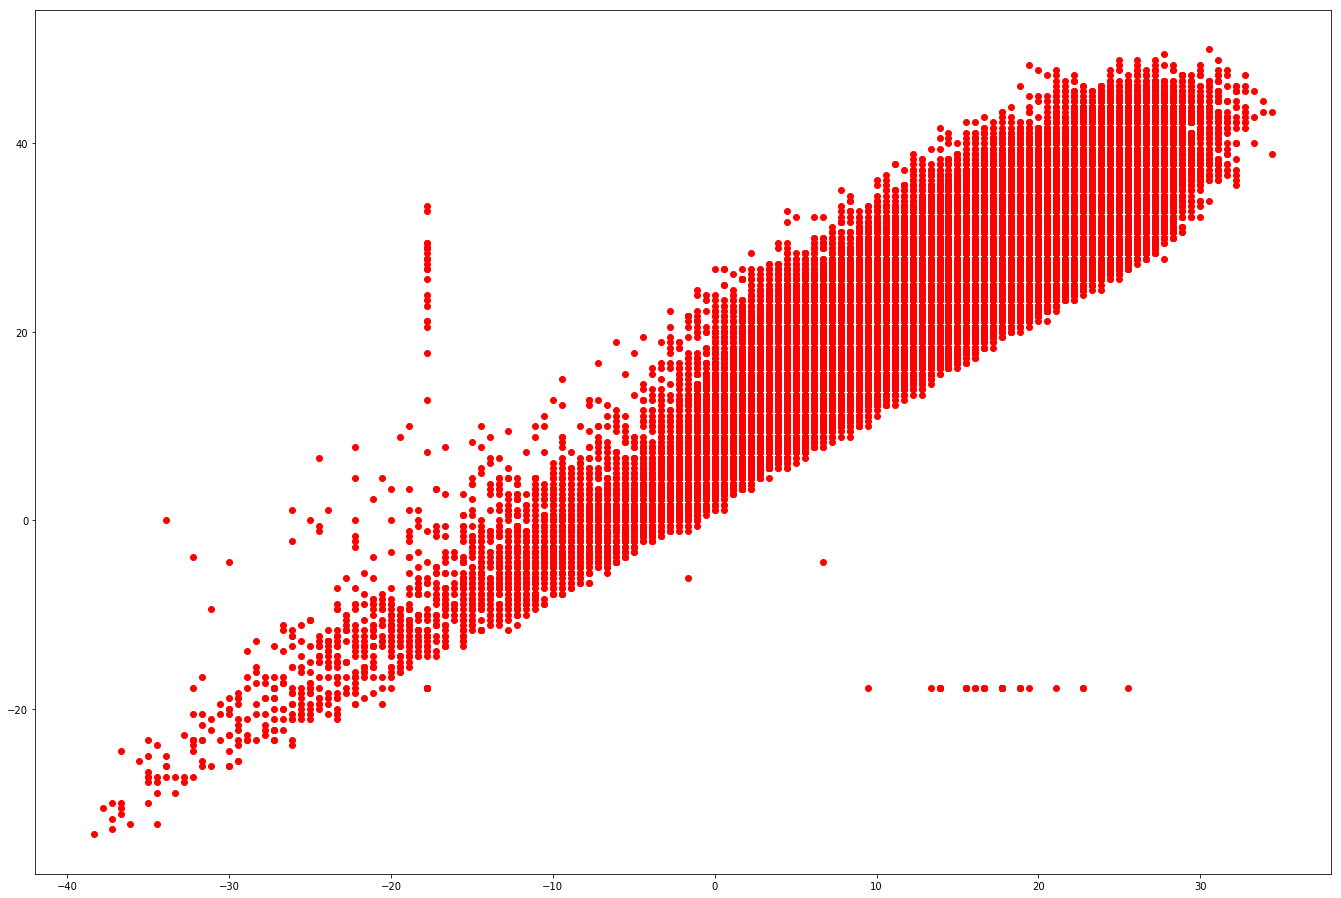

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,3]) 
ax.scatter(X, y, color = "red")
plt.show

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)

In [34]:
print('train accuracy: ',reg.score(X_train,y_train)*100)
print('test accuracy:  ',reg.score(X_test,y_test)*100)

train accuracy:  76.99700618286289
test accuracy:   77.5164951259109


In [35]:
reg.predict([[-2]])

array([[11.76657741]])

<function matplotlib.pyplot.show(*args, **kw)>

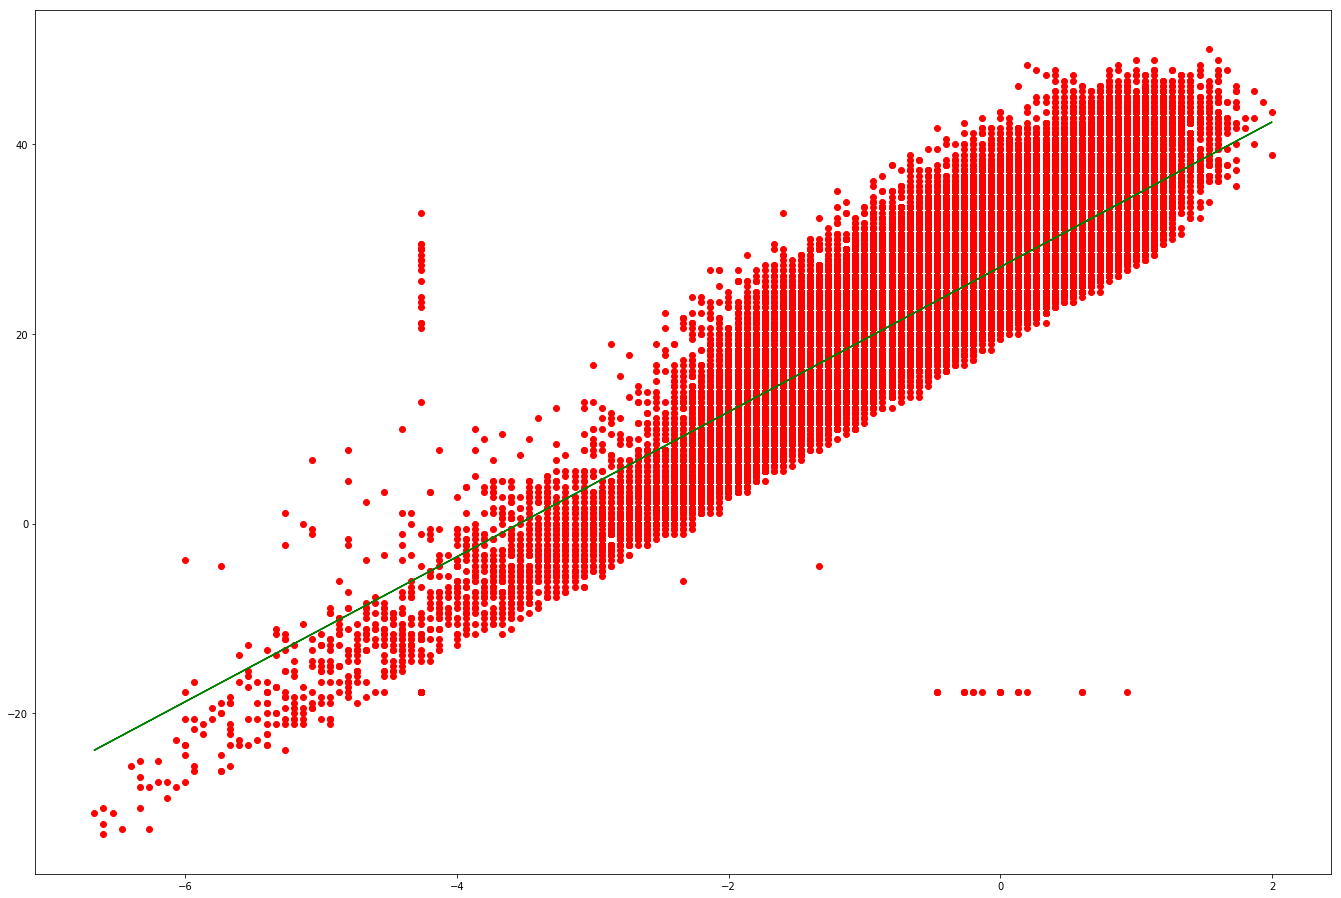

In [36]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,3]) 
ax.scatter(X_train, y_train, color = "red")
ax.plot(X_train, reg.predict(X_train), color = "g")
plt.show

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,3])
ax.hist(data[:,5], bins = [-10,-6,-,75,100],histtype = 'step')
ax.bar(data[:,5],data[:,4])
plt.show()

<h1>---------------------------------------------------------------------------------------</h1>

<h3>Logistic Regression </h3>
